In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("E:/Userfiles/Download/archive (4)/UpdatedResumeDataSet.csv")

In [3]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


## DATA VISUALIZATION

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

<AxesSubplot:xlabel='count', ylabel='Category'>

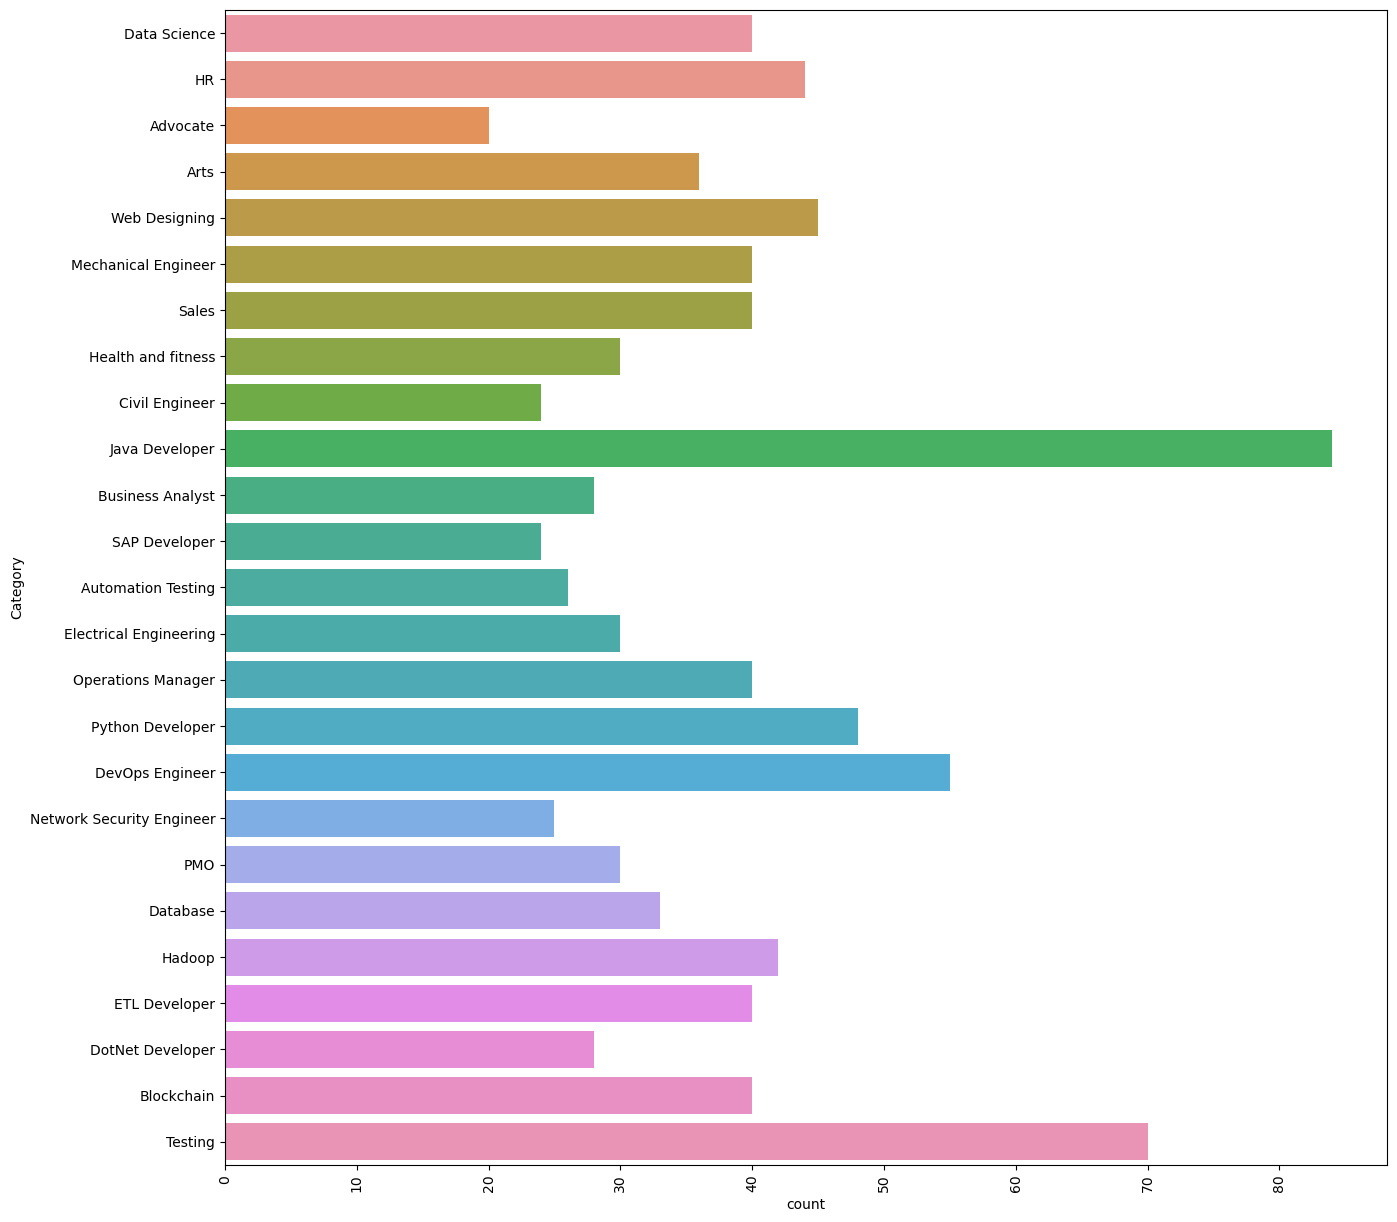

In [7]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df)

In [8]:
#pie plot

targetCounts = df['Category'].value_counts().reset_index()['Category']
targetLabels  = df['Category'].value_counts().reset_index()['index']

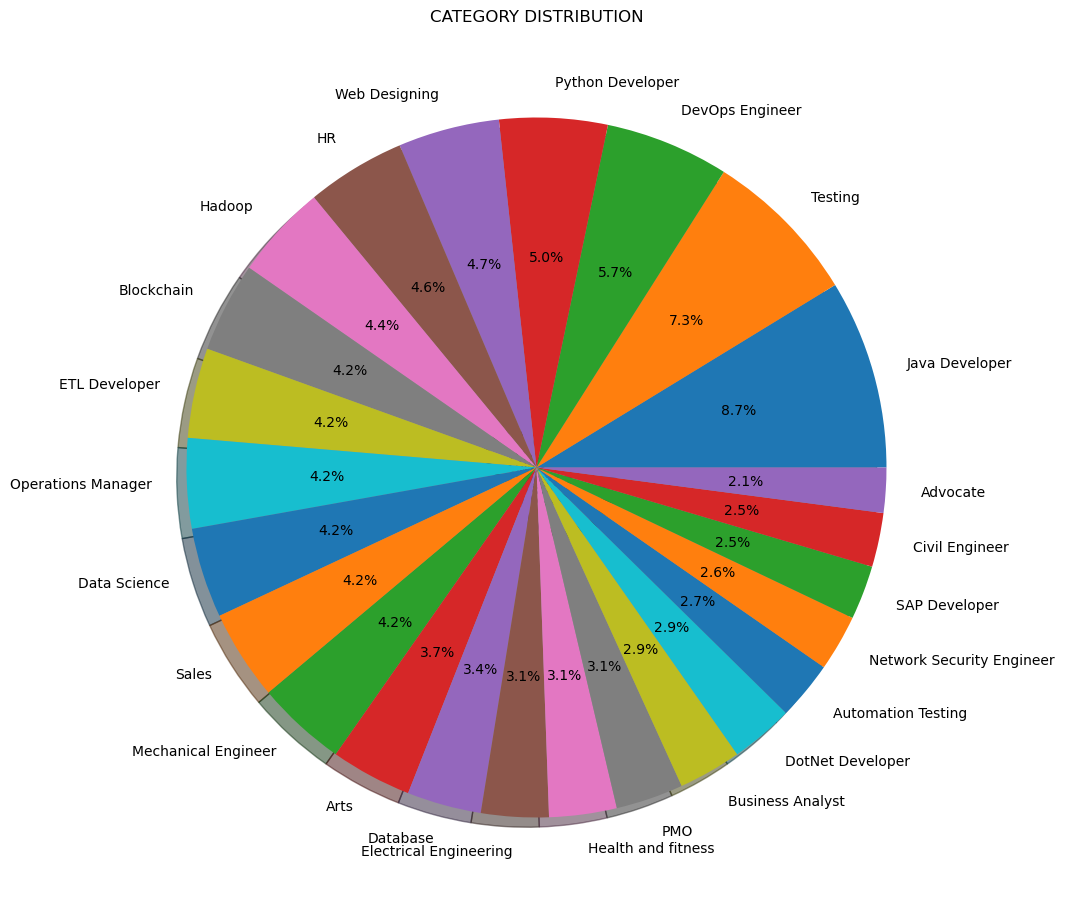

In [9]:
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, )

In [10]:
from nltk.util import pr

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import re

import nltk
stemmer = nltk.SnowballStemmer("english")

from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stopword=set(stopwords.words('english'))

import warnings
# so that the program doesn't stop whenever an exception occurs


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["Resume"] = df["Resume"].apply(clean)

## FORMING FEATURE MATRIX AND PREDICTING

In [12]:
X = df.Resume
y = df.Category

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [14]:
cv = CountVectorizer()
X_train_dtm = cv.fit_transform(X_train) 

cv.get_feature_names_out()
X_train_dtm

<673x6395 sparse matrix of type '<class 'numpy.int64'>'
	with 106926 stored elements in Compressed Sparse Row format>

In [15]:
X_test_dtm = cv.transform(X_test)
cv.get_feature_names_out()
X_test_dtm

<289x6395 sparse matrix of type '<class 'numpy.int64'>'
	with 46759 stored elements in Compressed Sparse Row format>

In [16]:
from sklearn.naive_bayes import MultinomialNB

In [17]:
classifier = MultinomialNB()
%time classifier.fit(X_train_dtm, y_train)

Wall time: 96.6 ms


MultinomialNB()

In [18]:
y_pred_class = classifier.predict(X_test_dtm)

In [19]:
# calculate accuracy of class predictions

from sklearn import metrics
print('Accuracy score: ',metrics.accuracy_score(y_test, y_pred_class))

Accuracy score:  0.986159169550173


In [20]:
# examine class distribution

print(y_test.value_counts())

Java Developer               28
Testing                      24
DevOps Engineer              19
HR                           17
Operations Manager           16
Python Developer             14
Mechanical Engineer          12
Data Science                 11
Sales                        11
DotNet Developer             11
Blockchain                   11
Civil Engineer               11
Health and fitness           10
Hadoop                        9
ETL Developer                 9
PMO                           9
Electrical Engineering        9
Database                      9
SAP Developer                 9
Business Analyst              9
Arts                          8
Automation Testing            7
Advocate                      6
Web Designing                 6
Network Security Engineer     4
Name: Category, dtype: int64


In [21]:
# check the accuracy on the training set

print(classifier.score(X_train_dtm, y_train))
print(classifier.score(X_test_dtm, y_test))

0.9955423476968797
0.986159169550173


In [22]:
sample = 'business design analysis software windows'
w = cv.transform([sample]).toarray()
abc = classifier.predict(w)
print(abc)

['Web Designing']


# DEPLOYMENT OF THE ML MODEL WITH STREAMLIT

In [23]:
import pickle 
!pip install streamlit
import streamlit as st

In [25]:
# saving the vectorizer as pickle

pkl_out=open("vectorizer1.pkl", "wb")
pickle.dump(cv, pkl_out)
pkl_out.close()

In [26]:
# pickling the model

pickle_out = open("classifier1.pkl", "wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()